In [24]:
from math import log

def heterology_index(counts:dict[str:list],seqs:str) -> float:
    """
    Calcola l'heterology index rispetto a un motivo come riportato da (Lewis et al. 1994, J. Mol. Biol. 241)
    :param counts: un dizionario con il conteggio delle basi per ogni posizione del motivo
    :param seqs:  una sequenza di nucleotidi della stessa lunghezza del motivo di cui calcolare l'heterology index
    :return:    l'heterology index della sequenza rispetto al motivo
    """
    heterology = 0
    for i,c in enumerate(seqs):
        cons=max(counts[c][i] for c in counts)
        actual = counts[seqs[i]][i]
        heterology += log((cons+0.5)/(actual+0.5))
    return heterology

In [19]:
motif.consensus

Seq('TAGTACATTTGTACTA')

In [14]:
#come previsto, l'heterology index è 0 per il consensus
heterology_index(motif.counts,str(motif.consensus))

7.0
24.0
6.0
62.0


In [33]:
import pandas as pd
from Bio import SeqIO
file = "/home/davide/PycharmProjects/TESI2/intergeniche_RefSeq/Chroococcidiopsis_sp._CCMEE_29_GCF_023558375_intergen.fasta"
#create a dictionary locus_tag:length of the sequence
diz = {}
for record in SeqIO.parse(file, "fasta"):
    diz[record.id] = len(record.seq)
diz
fimo="/home/davide/Desktop/genomiChro/MEME/fimo_motivo8_oops/fimo.tsv"
df_fimo=pd.read_csv(fimo,sep="\t")
df_fimo=df_fimo[:-3]
#convert q-value column to float e notation with 2 decimal places
df_fimo["q-value"]=df_fimo["q-value"].apply(lambda x:format(x, '.2e'))
df_fimo["p-value"]=df_fimo["p-value"].apply(lambda x:format(x, '.2e'))
df_fimo["score"]=df_fimo["score"].apply(lambda x:round(x,2))
#create new column that is tuple of matched_sequence and score|p-value|q-value
df_fimo["score_info"]=df_fimo['score'].astype(str)+"|"+df_fimo['p-value'].astype(str)+"|"+df_fimo['q-value'].astype(str)
df_fimo["length"]=df_fimo["sequence_name"].map(diz)
df_fimo["pos"]=df_fimo["start"]-df_fimo["length"]+1
df_fimo["heterology_index"]=df_fimo.apply(lambda x:heterology_index(motif.counts,x["matched_sequence"]),axis=1)
#create new tupe column motivo with tuple of matched_sequence,score|p-value|q-value,pos
df_fimo["motivo"]=df_fimo.apply(lambda x:(x["matched_sequence"],x["pos"],x["score_info"],x["heterology_index"]),axis=1)
#only columns sequence_name and motivo
df_fimo=df_fimo[["sequence_name","motivo","heterology_index"]]
df_fimo=df_fimo.rename(columns={"sequence_name":"locus_tag"})
#sort by heterology index
df_fimo.sort_values(by="heterology_index")
df_fimo

,locus_tag,motivo,heterology_index
0,LAU37_RS05875,"(TAGTACATTTGTACTA, -129.0, 21.39|9.19e-10|4.81...",0.000000
1,LAU37_RS16180,"(TAGTACAAATGTACTA, -298.0, 21.24|1.42e-09|4.81...",1.040963
2,LAU37_RS14595,"(TAGTACATATGTACTA, -206.0, 21.04|1.89e-09|4.81...",0.825075
3,LAU37_RS14590,"(TAGTACATATGTACTA, -156.0, 21.04|1.89e-09|4.81...",0.825075
4,LAU37_RS19450,"(TAGTTCATTTGTACTA, -65.0, 20.34|7.13e-09|1.45e...",0.326397
...,...,...,...
114,LAU37_RS21980,"(CAGTTTTAAAGCACTA, -47.0, 10.1|9.73e-05|8.48e-...",7.580392
115,LAU37_RS11925,"(CAGTGCCTCTTTTCTA, -26.0, 10.1|9.73e-05|8.48e-...",6.263811
116,LAU37_RS31010,"(TAGTGAAGTACGACTG, -187.0, 10.09|9.79e-05|8.48...",12.603547
117,LAU37_RS10275,"(GAGGTAAAAGGTACTA, -25.0, 10.07|9.85e-05|8.48e...",12.167222


In [34]:
df_ann=pd.read_csv("/home/davide/Desktop/CCMEE29Annotazioni.csv")
#rename column sequence_name to locus_tag
df_ann=df_ann.rename(columns={"sequence_name":"locus_tag"})
df=pd.merge(df_fimo,df_ann,on="locus_tag")
df

,locus_tag,motivo,heterology_index,protein_id,product,gene,GO_process,GO_component,GO_function,GO_process_pannzer2,KEGG_brite,KEGG_pathways
0,LAU37_RS05875,"(TAGTACATTTGTACTA, -129.0, 21.39|9.19e-10|4.81...",0.000000,WP_250124683.1,VOC family protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LAU37_RS16180,"(TAGTACAAATGTACTA, -298.0, 21.24|1.42e-09|4.81...",1.040963,WP_250121527.1,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LAU37_RS14595,"(TAGTACATATGTACTA, -206.0, 21.04|1.89e-09|4.81...",0.825075,WP_250121243.1,ERF family protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LAU37_RS14590,"(TAGTACATATGTACTA, -156.0, 21.04|1.89e-09|4.81...",0.825075,WP_250121242.1,FAD-dependent oxidoreductase,NaN,NaN,NaN,['GO:0016491 - oxidoreductase activity [Eviden...,NaN,NaN,NaN
4,LAU37_RS19450,"(TAGTTCATTTGTACTA, -65.0, 20.34|7.13e-09|1.45e...",0.326397,WP_250122141.1,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
108,LAU37_RS21985,"(TAGTGCTTTAAAACTG, -105.0, 10.12|9.62e-05|8.48...",9.873230,WP_250122603.1,3-oxoacyl-[acyl-carrier-protein] reductase,fabG,['GO:0006633 - fatty acid biosynthetic process...,NaN,['GO:0004316 - 3-oxoacyl-[acyl-carrier-protein...,GO:0006633 - fatty acid biosynthetic process,ko01004 Lipid biosynthesis proteins,"01100 Metabolic pathways, 01110 Biosynthesis o..."
109,LAU37_RS21980,"(CAGTTTTAAAGCACTA, -47.0, 10.1|9.73e-05|8.48e-...",7.580392,WP_250122602.1,thioredoxin,trxA,NaN,['GO:0005737 - cytoplasm [Evidence IEA]'],['GO:0015036 - disulfide oxidoreductase activi...,NaN,NaN,NaN
110,LAU37_RS11925,"(CAGTGCCTCTTTTCTA, -26.0, 10.1|9.73e-05|8.48e-...",6.263811,WP_250125775.1,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,LAU37_RS10275,"(GAGGTAAAAGGTACTA, -25.0, 10.07|9.85e-05|8.48e...",12.167222,WP_250125476.1,DNA-binding protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.to_excel("/home/davide/Desktop/fimo_motivo8_heterology_index.xlsx",index=False)

In [3]:
import pandas as pd
data = pd.read_excel("/home/davide/Desktop/motivi_sortedgaps.xlsx")
data.index = data["qseqid"]
data = data.drop(columns="qseqid")
data 

,Chroococcidiopsis_sp._CCMEE_29_GCF_023558375,Chroococcidiopsis_sp._CCNUC1_GCF_023546805,Chroococcidiopsis_sp._TS-821_GCF_002939305,Chroococcidiopsis_sp._SAG_2025_GCF_032860985,Chroococcidiopsis_cubana_CCALA_043_GCF_003003835,Chroococcidiopsis_sp._CCALA_051_GCF_003015105,Chroococcidiopsis_sp._[FACHB-1243]_GCF_014696895,Chroococcidiopsis_cubana_SAG_39.79_GCF_034438355.1,Chroococcidiopsis_thermalis_PCC_7203_GCF_000317125,gap
qseqid,,,,,,,,,,
WP_250124755.1,"[('CATAAGTTCAGTCCTCTCACTGGTT', -171, 11), ('GG...","[('TGTGAGTTCAGTCCTGTAACTGGTT', -175, 11)]","[('TGCAAGTAACCTTTAATGACTGAGC', -219, 11), ('CT...","[('TGTGAGTTCAGTCCTGTAACTGGTT', -175, 11)]","[('TGTGAGTTCAGTCCTGTAACTGGTT', -175, 11)]","[('TGTGAGTTCAGTCCTGTAACTGGTT', -175, 11)]","[('TGTGAGTTCAGTCCTGTAACTGGTT', -175, 11)]","[('TGTGAGTTCAGTCCTGTAACTGGTT', -175, 11)]","[('TGTGAGTTCAGTCCTGTAACTGGTT', -175, 11)]","(11, 9)"
WP_250123779.1,"[('AGCAAGTGGAAGTAATTTACTTCTT', -36, 11)]","[('AGCGAGTGGAAGAGACTGACTCTTG', -35, 11)]","[('GGCAAGTGGAAGTGAGTGACTTCTT', -36, 11), ('GTA...","[('GGCGAGTGGAAGAGACTGACTCTTG', -35, 11)]","[('AGCGAGTGGAAGAGACTGACTCTTG', -35, 11)]","[('AGCGAGTGGAAGAGACTGACTCTTG', -35, 11)]","[('GGCGAGTGGAAGAGACTGACTCTTG', -35, 11)]","[('AGCGAGTGGAAGAGACTGACTCTTG', -35, 11)]","[('AGCGAGTGGAAGAGACTGACTCTTG', -35, 11)]","(11, 9)"
WP_250125318.1,"[('ACACAGTAAATTCAACTTATC', -82, 7), ('TGTGAGTA...","[('TGTGAGTAGGCAAATATAACTACTG', -33, 11)]","[('TGTGAGTAGGCAAAAATAACTATAT', -55, 11), ('TGT...","[('TGTGAGTAGGCAAAAATAACTACTG', -33, 11)]","[('TGTGAGTAGGCAAATATAACTACTG', -33, 11)]","[('TGTGAGTAGGCAAATATAACTACTG', -33, 11)]","[('TGTGAGTAGGCAAATATAACTACTG', -33, 11)]","[('TGTGAGTAGGCAAATATAACTACTG', -33, 11)]","[('TGTGAGTAGGCAAATATAACTACTG', -33, 11)]","(11, 9)"
WP_250122886.1,"[('GCCTAGTAAGTACTCGTA', -278, 4), ('AGTCAGTGAA...","[('AATCAGTCACTGGTCACTGGTC', -131, 8), ('TTTAAG...","[('CGCAAGTGCAGGCACTAGACTACAG', -272, 11), ('AC...","[('TTTAAGTTTTGCGCCTCTACTTTCT', -38, 11), ('TTT...","[('AATCAGTCACTGGTCACTGGTC', -131, 8), ('TTTAAG...","[('AATCAGTCACTGGTCACTGGTC', -131, 8), ('TTTAAG...","[('AATCAGTCACTGGTCACTGGTC', -124, 8), ('TTTAAG...","[('AATCAGTCACTGGTCACTGGTC', -131, 8), ('TTTAAG...","[('AATCAGTCACTGGTCACTGGTC', -131, 8), ('TTTAAG...","(11, 8)"
WP_250123657.1,"[('GCAAAGTTAGAAGCTATCGT', -71, 5)]","[('CGAAAGTGTTTGAAAGTGACTGTTT', -146, 11), ('CC...","[('AATGAGTAAGACGATCGAACTCAGT', -180, 11)]","[('CGGGAGTTGGTATTACTTTTA', -290, 7), ('CGAAAGT...","[('AATGAGTCACAGTTTTTTACTTCTA', -85, 11), ('TCA...","[('CGAAAGTGTTTGAAAGTGACTGTTT', -146, 11), ('AA...","[('CGAAAGTGTTTGAAAATGACTGTTT', -209, 11), ('CC...","[('CGAAAGTGTTTGAAAGTGACTGTTT', -146, 11), ('AA...","[('CGAAAGTGTTTGAAAGTAACTGTTT', -146, 11), ('CC...","(11, 8)"
...,...,...,...,...,...,...,...,...,...,...
WP_250125851.1,NaN,NaN,NaN,"[('ATTTAGTACAGCTATGCT', -68, 3)]",NaN,NaN,NaN,NaN,NaN,"(3, 1)"
WP_250124035.1,"[('ACCCAGTTCATTTTCTAACCC', -259, 6), ('TAATAGT...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(3, 1)"
WP_250125600.1,NaN,"[('GCCAAGTCATAGCCACTCAAG', -229, 7), ('GCTGAGT...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(3, 1)"


In [4]:
from Bio.Seq import Seq
from Bio import motifs
def create_motif(index_list, data):
    selected_rows = data.loc[index_list]
    instances = []
    for index, row in selected_rows.iterrows():
        gap = eval(row["gap"])
        gap = gap[0]
        for col in row.index:
            if col == "gap":
                continue
            if type(row[col]) == float:
                continue
            row[col] = eval(row[col])
            for item in row[col]:
                if item[-1] == gap:
                    if item[0][-7:-4] == "CTA":
                        instances.append(Seq(item[0][3:-4]))
                    else:
                        instances.append(Seq(item[0][3:-3]))
    m = motifs.create(instances)
    return m

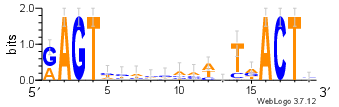

In [5]:
index_list = """WP_250124755.1
WP_250123779.1
WP_250125318.1
WP_250122886.1
WP_250123657.1
""".split()
m = create_motif(index_list, data)
motivo11=m
m.weblogo("motif.png")
from IPython.display import Image
Image("motif.png")

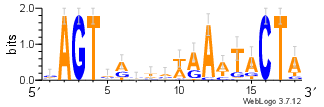

In [6]:
index_list = """WP_250123271.1
WP_250125821.1
WP_250124730.1
WP_250124115.1
WP_250124342.1
""".split()
m = create_motif(index_list, data)
motivo10=m
m.weblogo("motif.png")
from IPython.display import Image
Image("motif.png")

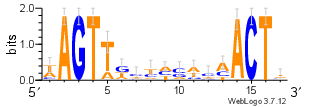

In [7]:
index_list = """WP_250123860.1
WP_256478962.1
WP_250125543.1
WP_250123278.1
WP_250124799.1
""".split()
m = create_motif(index_list, data)
motivo9=m
m.weblogo("motif.png")
from IPython.display import Image
Image("motif.png")

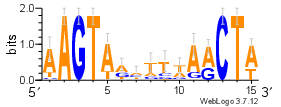

In [8]:
index_list = """WP_250124371.1
WP_250124803.1
WP_250123724.1
WP_250124697.1
WP_250122355.1
""".split()
m = create_motif(index_list, data)
motivo7=m
m.weblogo("motif.png")
from IPython.display import Image
Image("motif.png")

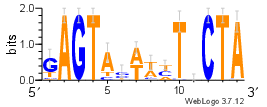

In [9]:
index_list = """WP_250122330.1
WP_250126145.1
WP_250124343.1
WP_250125723.1
WP_250125827.1
""".split()
m = create_motif(index_list, data)
motivo6=m
m.weblogo("motif.png")
from IPython.display import Image
Image("motif.png")

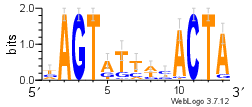

In [10]:
index_list = """WP_250122079.1
WP_250125646.1
WP_250124984.1
WP_250125618.1
WP_250124368.1
""".split()
m = create_motif(index_list, data)
motivo5=m
m.weblogo("motif.png")
from IPython.display import Image
Image("motif.png")

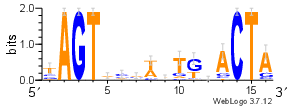

In [11]:
index_list = """WP_250122517.1
WP_250123666.1
WP_250124474.1
WP_250121220.1
WP_250122141.1
WP_250122036.1
WP_250121493.1
WP_250126127.1
WP_250125317.1
WP_250122575.1""".split()
m = create_motif(index_list, data)
motivo8=m
m.weblogo("motif.png")
from IPython.display import Image
Image("motif.png")

In [15]:
from Bio import motifs
from Bio.Seq import Seq

def motivo_to_meme(motif: motifs.Motif, out_file):
    pwm = motif.pwm
    df = pd.DataFrame(pwm)
    df_string = df.to_string(header=False, index=False)
    # Create the MEME Motif Format text
    meme_text = "MEME version 5.5\n\n"
    meme_text += f"ALPHABET= ACGT\n\n"
    meme_text += f"strands: +\n\n"
    meme_text += f"MOTIF {motif.degenerate_consensus} {motif.name}\n\n"
    meme_text += f"letter-probability matrix: alength= 4 w= {motif.length} nsites= {len(motif.alignment)} E= 0\n"
    meme_text += df_string
    # Write the MEME Motif Format text to a file
    with open(out_file, "w") as f:
        f.write(meme_text)
    return meme_text

In [16]:
lista=[motivo5,motivo6,motivo7,motivo8,motivo9,motivo10,motivo11]
for i,m in enumerate(lista):
    m.name=f"motivo{i+5}"
    motivo_to_meme(m,f"/home/davide/Desktop/genomiChro/MEME/motivi/motivo{i+5}.meme")

In [22]:
import subprocess
#add fimo to the path

# fimo --o /home/davide/Desktop/genomiChro/MEME/fimo_motivo8_oops --norc /home/davide/Desktop/genomiChro/MEME/motivi/motivo8_oops.meme /home/davide/PycharmProjects/TESI2/intergeniche_RefSeq/Chroococcidiopsis_sp._CCMEE_29_GCF_023558375_intergen.fasta
for i in range(5,12):
    subprocess.run(["/home/davide/meme/bin/fimo","--oc",f"/home/davide/Desktop/genomiChro/MEME/fimo_motivo{i}","--norc",f"/home/davide/Desktop/genomiChro/MEME/motivi/motivo{i}.meme","/home/davide/PycharmProjects/TESI2/intergeniche_RefSeq/Chroococcidiopsis_sp._CCMEE_29_GCF_023558375_intergen.fasta"])

Using motif +NAGTATTWNACTA of width 13.
Finding best site passing the output threshold in each of the 5778 sequences.
Found a best site in 111 sequences.
Computing q-values.
# Computing q-values.
#   Estimating pi_0 from a uniformly sampled set of 10000 p-values.
#   Estimating pi_0.
# Minimal pi_zero = 0.945
#   Estimated pi_0=0.95292
Using motif +GAGTANWWYTNCTA of width 14.
Finding best site passing the output threshold in each of the 5778 sequences.
Found a best site in 153 sequences.
Computing q-values.
# Computing q-values.
#   Estimating pi_0 from a uniformly sampled set of 10000 p-values.
#   Estimating pi_0.
# Minimal pi_zero = 0.922913
#   Estimated pi_0=0.931724
Using motif +AAGTARNTTWARCTW of width 15.
Finding best site passing the output threshold in each of the 5778 sequences.
Found a best site in 175 sequences.
Computing q-values.
# Computing q-values.
#   Estimating pi_0 from a uniformly sampled set of 10000 p-values.
#   Estimating pi_0.
# Minimal pi_zero = 0.9496
#   E

In [30]:
from Bio import SeqIO
file = "/home/davide/PycharmProjects/TESI2/intergeniche_RefSeq/Chroococcidiopsis_sp._CCMEE_29_GCF_023558375_intergen.fasta"
#create a dictionary locus_tag:length of the sequence
diz = {}
for record in SeqIO.parse(file, "fasta"):
    diz[record.id] = len(record.seq)
import pandas as pd

# List to store all dataframes
df_list = []

# Loop over the range of motif lengths
for i in range(5, 12):
    # Modify the fimo file path and motivo variable to match the current motif length
    fimo = f"/home/davide/Desktop/genomiChro/MEME/fimo_motivo{i}/fimo.tsv"
    motivo = globals()[f'motivo{i}']
    # Create the dataframe
    df_fimo = pd.read_csv(fimo, sep="\t")
    df_fimo = df_fimo[:-3]
    df_fimo["q-value"] = df_fimo["q-value"].apply(lambda x: format(x, '.2e'))
    df_fimo["p-value"] = df_fimo["p-value"].apply(lambda x: format(x, '.2e'))
    df_fimo["score"] = df_fimo["score"].apply(lambda x: round(x, 2))
    df_fimo["score_info"] = df_fimo['score'].astype(str) + "|" + df_fimo['p-value'].astype(str) + "|" + df_fimo['q-value'].astype(str)
    df_fimo["length"] = df_fimo["sequence_name"].map(diz)
    df_fimo["pos"] = df_fimo["start"] - df_fimo["length"] + 1
    df_fimo["heterology_index"] = df_fimo.apply(lambda x: heterology_index(motivo.counts, x["matched_sequence"]), axis=1)
    df_fimo["motivo"] = df_fimo.apply(lambda x: (x["matched_sequence"], x["pos"], x["score_info"]), axis=1)
    df_fimo = df_fimo[["sequence_name", "motivo", "heterology_index"]]
    df_fimo["gap"]=i
    df_fimo = df_fimo.rename(columns={"sequence_name": "locus_tag"})
    df_fimo = df_fimo.sort_values(by="heterology_index")
    

    # Append the dataframe to the list of dataframes
    df_list.append(df_fimo)

# Concatenate all the dataframes in the list into one dataframe
df_final = pd.concat(df_list)

In [32]:
df_ann=pd.read_csv("/home/davide/Desktop/CCMEE29Annotazioni.csv")
#rename column sequence_name to locus_tag
df_ann=df_ann.rename(columns={"sequence_name":"locus_tag"})
df=pd.merge(df_final,df_ann,on="locus_tag")
df

,locus_tag,motivo,heterology_index,gap,protein_id,product,gene,GO_process,GO_component,GO_function,GO_process_pannzer2,KEGG_brite,KEGG_pathways
0,LAU37_RS27355,"(AAGTATTTGACTA, -61.0, 17.34|7.32e-07|7.36e-01)",1.064434,5,WP_250123554.1,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LAU37_RS29830,"(TAGTATTAAACTA, -74.0, 15.66|3.81e-06|8.65e-01)",1.945910,5,WP_250126287.1,GNAT family N-acetyltransferase,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LAU37_RS13480,"(AAGTATTTAACTA, -110.0, 14.88|6.61e-06|8.65e-01)",2.478127,5,WP_250126049.1,glycoside hydrolase family 31 protein,NaN,NaN,NaN,NaN,GO:0005975 - carbohydrate metabolic process,NaN,"01100 Metabolic pathways, 01110 Biosynthesis o..."
3,LAU37_RS01855,"(CAGTATTTGACTA, -48.0, 15.11|5.82e-06|8.65e-01)",2.729441,5,WP_250123941.1,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LAU37_RS29825,"(TAGTTTAATACTA, -98.0, 14.02|1.07e-05|8.65e-01)",3.156462,5,WP_250126286.1,aminoglycoside phosphotransferase family protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,LAU37_RS20180,"(AAGTCCTCGGTTGGGACTG, -157.0, 8.07|8.01e-05|7....",9.189122,11,WP_250122278.1,BrnT family toxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,LAU37_RS29195,"(AAGTCAAGCATTGGAACTC, -67.0, 6.98|9.99e-05|7.1...",9.249342,11,WP_250126759.1,RidA family protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,LAU37_RS26440,"(AAGTGAGTAGGACAGACTG, -18.0, 7.16|9.60e-05|7.1...",9.297844,11,WP_250123417.1,"9,9'-di-cis-zeta-carotene desaturase",zds,NaN,NaN,NaN,GO:0016117 - carotenoid biosynthetic process,NaN,"01100 Metabolic pathways, 01110 Biosynthesis o..."
1006,LAU37_RS28985,"(AAGTTGCCTTACTCCACTT, -121.0, 7.01|9.91e-05|7....",9.502585,11,WP_250126728.1,hypothetical protein,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.to_excel("/home/davide/Desktop/motiviMEME_heterology_index.xlsx",index=False)